In [93]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
import xgboost as xg

In [94]:
X,y=load_breast_cancer(return_X_y=True)
mod=RandomForestClassifier(n_estimators=100,max_depth=7)
kf=KFold(n_splits=4)

In [95]:
import numpy as np
cv_scores=cross_val_score(mod,X,y,cv=kf)
cv_scores=np.round(cv_scores,4)

In [96]:
for cv in cv_scores:
    print(cv)
print(f"average:{np.mean(cv_scores)}")

0.9021
0.9789
0.9577
0.9859
average:0.95615


In [97]:
import pandas as pd

data=pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [98]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [100]:
X=data.drop(columns=['Class'])
y=data['Class']

In [ ]:
cv_scores=cross_val_score(mod,X,y,cv=kf)
cv_scores=np.round(cv_scores,4)

In [ ]:
for cv in cv_scores:
    print(cv)
print(f"average:{np.mean(cv_scores)}")

0.6989
0.8896
0.8203
0.8228
average:0.8079


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skfold=StratifiedKFold(n_splits=10)
sk_score=cross_val_score(mod,X,y,cv=skfold)
sk_score=np.round(sk_score,4)

In [ ]:
for cv in sk_score:
    print(cv)
print(f"average:{np.mean(sk_score)}")

0.8887
0.7113
0.781
0.7939
0.9335
0.9015
0.8089
0.898
0.8757
0.9081
average:0.85006


In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Define a dummy pipeline with a placeholder
pipe = Pipeline([
    ('clf', RandomForestClassifier())       # Initial estimator (can be anything)
])

# Step 2: Define your parameter grid, including estimator options
param_grid = [
    {
        'clf': [xg.XGBClassifier()],
        'clf__n_estimators': [100,200],
        'clf__max_depth': [10,50,60]
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20]
    }
]

# Step 3: Grid search across all estimators and parameters

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=4)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"[{'clf': [XGBClassifier...ree=None, ...)], 'clf__max_depth': [10, 50, ...], 'clf__n_estimators': [100, 200]}, {'clf': [RandomForestClassifier()], 'clf__max_depth': [None, 10, ...], 'clf__n_estimators': [100, 200]}]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [107]:
grid.best_estimator_
grid.best_params_
grid.best_score_

np.float64(0.9626373626373625)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[10,50,60],'criterion':['gini','entropy'],'n_estimators':[50,100,200]}
grid=GridSearchCV(RandomForestClassifier(),
                  params,
                  cv=5,
                  scoring='accuracy',
                  verbose=2,
                  n_jobs=-1)


In [ ]:
grid.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [10, 50, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
grid.best_params_
grid.best_score_

np.float64(0.968390001552554)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [117]:
rand=RandomizedSearchCV(pipe,param_grid,scoring='roc_auc',verbose=3,n_jobs=-1)
rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step...lassifier())])
,param_distributions,"[{'clf': [XGBClassifier...ree=None, ...)], 'clf__max_depth': [10, 50, ...], 'clf__n_estimators': [100, 200]}, {'clf': [RandomForestClassifier()], 'clf__max_depth': [None, 10, ...], 'clf__n_estimators': [100, 200]}]"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [118]:
print(rand.best_estimator_)
print(rand.best_score_)
print(rand.best_params_)

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None

In [119]:
pd.DataFrame(rand.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,param_clf__max_depth,param_clf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.539813,0.064806,0.036708,0.041264,100,10,"XGBClassifier(base_score=None, booster=None, c...","{'clf__n_estimators': 100, 'clf__max_depth': 1...",0.993208,0.996865,0.998433,0.992776,0.975232,0.991303,0.008317,4
1,0.640392,0.030276,0.039035,0.025532,100,None,RandomForestClassifier(),"{'clf__n_estimators': 100, 'clf__max_depth': N...",0.997126,0.992163,0.998433,0.994066,0.961558,0.988669,0.013734,8
2,1.817646,0.239736,0.044413,0.012908,200,None,RandomForestClassifier(),"{'clf__n_estimators': 200, 'clf__max_depth': N...",0.996343,0.991641,0.998433,0.992776,0.961816,0.988202,0.013416,9
3,0.731140,0.153096,0.023550,0.013972,100,10,RandomForestClassifier(),"{'clf__n_estimators': 100, 'clf__max_depth': 1...",0.995298,0.990857,0.997126,0.990196,0.962848,0.987265,0.012486,10
4,0.360500,0.100457,0.007965,0.004525,200,10,"XGBClassifier(base_score=None, booster=None, c...","{'clf__n_estimators': 200, 'clf__max_depth': 1...",0.992685,0.997910,0.998955,0.993292,0.975232,0.991615,0.008554,1
5,0.174087,0.048205,0.006828,0.000770,100,60,"XGBClassifier(base_score=None, booster=None, c...","{'clf__n_estimators': 100, 'clf__max_depth': 6...",0.993208,0.996865,0.998433,0.992776,0.975232,0.991303,0.008317,4
6,0.257987,0.036460,0.009121,0.002863,200,50,"XGBClassifier(base_score=None, booster=None, c...","{'clf__n_estimators': 200, 'clf__max_depth': 5...",0.992685,0.997910,0.998955,0.993292,0.975232,0.991615,0.008554,1
7,0.642619,0.142253,0.023231,0.006898,100,20,RandomForestClassifier(),"{'clf__n_estimators': 100, 'clf__max_depth': 2...",0.995820,0.991118,0.998694,0.992260,0.972652,0.990109,0.009129,7
8,1.307704,0.153700,0.026920,0.002542,200,10,RandomForestClassifier(),"{'clf__n_estimators': 200, 'clf__max_depth': 1...",0.996082,0.991902,0.998955,0.994582,0.972910,0.990886,0.009273,6
9,0.279520,0.058805,0.011101,0.003885,200,60,"XGBClassifier(base_score=None, booster=None, c...","{'clf__n_estimators': 200, 'clf__max_depth': 6...",0.992685,0.997910,0.998955,0.993292,0.975232,0.991615,0.008554,1


In [123]:
mod1=xg.XGBClassifier(max_depth=10,n_estimators=200)

In [124]:
mod1.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [138]:
y_pred_proba=mod1.predict_proba(X_test)[:,1]
y_pred_proba

array([9.5121843e-01, 9.9970502e-01, 9.9918610e-01, 9.9993360e-01,
       9.9977416e-01, 9.9925297e-01, 4.1373452e-04, 1.2600810e-04,
       9.9658656e-01, 1.8326048e-04, 6.6409963e-01, 9.9874842e-01,
       6.6107601e-01, 6.4252723e-05, 9.9983716e-01, 1.5380565e-04,
       2.6297892e-04, 1.9517439e-04, 1.2600810e-04, 9.9877864e-01,
       9.9950933e-01, 9.9945921e-01, 1.1936113e-03, 9.9732250e-01,
       9.9985242e-01, 8.7870546e-03, 1.4790572e-04, 9.9995911e-01,
       9.9890769e-01, 9.9995351e-01, 8.7844278e-04, 9.9996746e-01,
       2.5791590e-04, 9.9961424e-01, 9.9445069e-01, 4.7778543e-03,
       9.9970371e-01, 1.1334153e-01, 9.5490634e-01, 9.9971253e-01,
       3.5052895e-04, 9.9995160e-01, 9.9985158e-01, 8.3744985e-01,
       3.9790914e-04, 1.6188181e-04, 9.9979061e-01, 3.3216525e-03,
       9.9986577e-01, 9.9987209e-01, 9.9894243e-01, 9.9947888e-01,
       9.8837888e-01, 9.9921703e-01, 1.8801044e-04, 4.5175243e-02,
       9.9946815e-01, 5.7669007e-04, 5.6585479e-03, 9.9983811e

In [137]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

fpr,tpr,thresh=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)

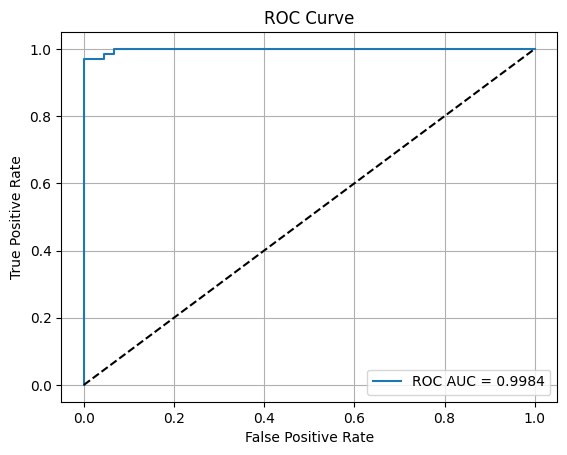

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()